In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('credit_data_cleaned.csv')

### The errors/warning messages - example 1

In [14]:
g = sns.catplot(x="X4 ", kind="count", data=df)
(g. set_axis_labels("marriage status", "count of credit card holders")
  .set_xticklabels(["married", "single", "divorce", "others"]))

ValueError: Could not interpret input 'X4 '

### error fixed: reading the error message and going back to the codes
#### when copying and pasting the variable, space is included. remove the space after the variable

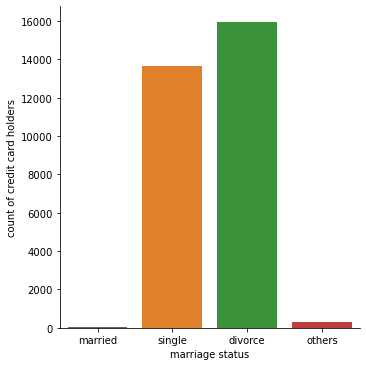

In [16]:
g = sns.catplot(x="X4", kind="count", data=df)
(g. set_axis_labels("marriage status", "count of credit card holders")
  .set_xticklabels(["married", "single", "divorce", "others"]))

### The errors/warning messages - example 2

In [17]:
df = pd.read_csv('credit_data.csv')

In [18]:
df.shape

(30204, 25)

In [19]:
df.loc[df.duplicated(), :]

,MyUnknownColumn,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
203,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
204,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
205,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
206,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
207,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,197,150000,female,university,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,not default
401,198,20000,female,graduate school,2,22,0,0,0,0,...,8332,18868,19247,1500,1032,541,20000,693,1000,not default
402,199,500000,female,graduate school,1,34,-2,-2,-2,-1,...,1251,1206,1151,138,2299,1251,1206,1151,15816,not default
403,200,30000,female,high school,2,22,1,2,2,0,...,29836,1630,0,1000,85,1714,104,0,0,default


In [20]:
df = df.drop_duplicates()

In [21]:
## drop row zeor that is the same as row 203 from the above output. 
## by checkiing the csv data, row 202 is a duplicate of the header.

df.drop([0, 202, 203], inplace = True)

KeyError: '[203] not found in axis'

### error fixed: found out row 203 was already deleted

In [22]:
df.drop([0, 202], inplace = True)

In [23]:
df.shape

(30000, 25)

### The errors/warning messages - example 3

In [24]:
data = pd.read_csv('Demographic_Data.csv')

In [25]:
x = pd.qcut(data['age'], q=5, labels=['18-31', '32-45', '46-59', '60-71','72-85'])

C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

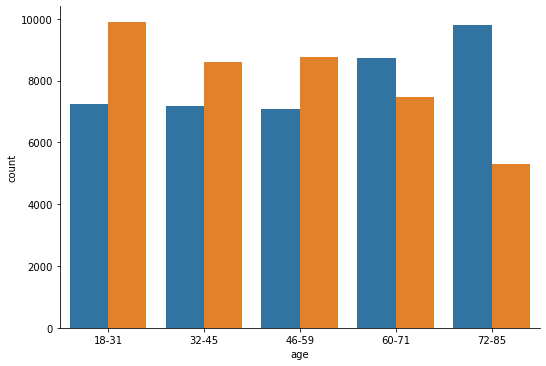

In [26]:
g = sns.catplot(x, data=data, kind='count', hue='in-store', ci=None, aspect=1.5)

### error fixed: seeking help from mentor

In [27]:
data['age_label'] = pd.qcut(data['age'], q=5, labels=['18-31', '32-45', '46-59', '60-71','72-85'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   in-store   80000 non-null  int64   
 1   age        80000 non-null  int64   
 2   items      80000 non-null  int64   
 3   amount     80000 non-null  float64 
 4   region     80000 non-null  int64   
 5   age_label  80000 non-null  category
dtypes: category(1), float64(1), int64(4)
memory usage: 3.1 MB


C:\Users\Dongmei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


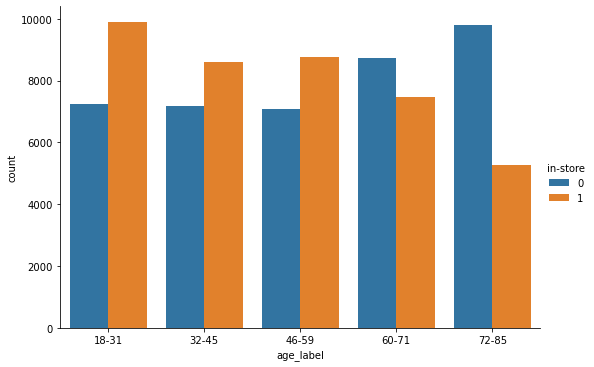

In [29]:
g = sns.catplot('age_label', data=data, kind='count', hue='in-store', ci=None, aspect=1.5)

### The errors/warning messages - example 4

In [30]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [32]:
X = data.iloc[:, [2,3,4]]

In [33]:
X.head()

,items,amount,region
0,4,281.03,2
1,2,219.51,2
2,3,1525.70,4
3,3,715.25,3
4,4,1937.50,1


In [34]:
y = data['in-store']

In [35]:
algos_Class = []
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [37]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
results.append(result)

In [38]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.8647124918326204


IndexError: list index out of range

### error fixed: seeking help from Mentor, got a hint and located the issue by myself: indenting issue is where. 

In [39]:
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [40]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.8238750072888021
Random Forest Classifier 0.8244500047889506
Gradient Boosting Classifier 0.8647124918326204
